# Rossmann Store Sale predict

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import threading

## 数据预处理

In [218]:
data_train = pd.read_csv(r'datasets/rossmann-store-sales/train.csv')
store_detail = pd.read_csv(r'datasets/rossmann-store-sales/store.csv')
data_test = pd.read_csv(r'datasets/rossmann-store-sales/test.csv')
data_train.head()

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_81716\4143386471.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv(r'datasets/rossmann-store-sales/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [219]:
display(data_train.info())
display(data_train.isnull().sum())
data_train.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


None

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


In [220]:
display(data_test.info())
data_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


None

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### test_data open字段填充

In [221]:
display(data_test[data_test['Open'].isnull()])

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [222]:
data_test.loc[[10751, 4759], 'Open'] = 0
display(data_test[data_test['Open'].isnull()])

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [223]:
data_test.fillna(1, inplace = True)
data_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### store-data 数据填充

In [224]:
store_detail.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [225]:
display(store_detail.info())
store_detail.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [226]:
store_detail.fillna(0, inplace=True)
display(store_detail.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### 查看销售时间序列

<Axes: xlabel='Date'>

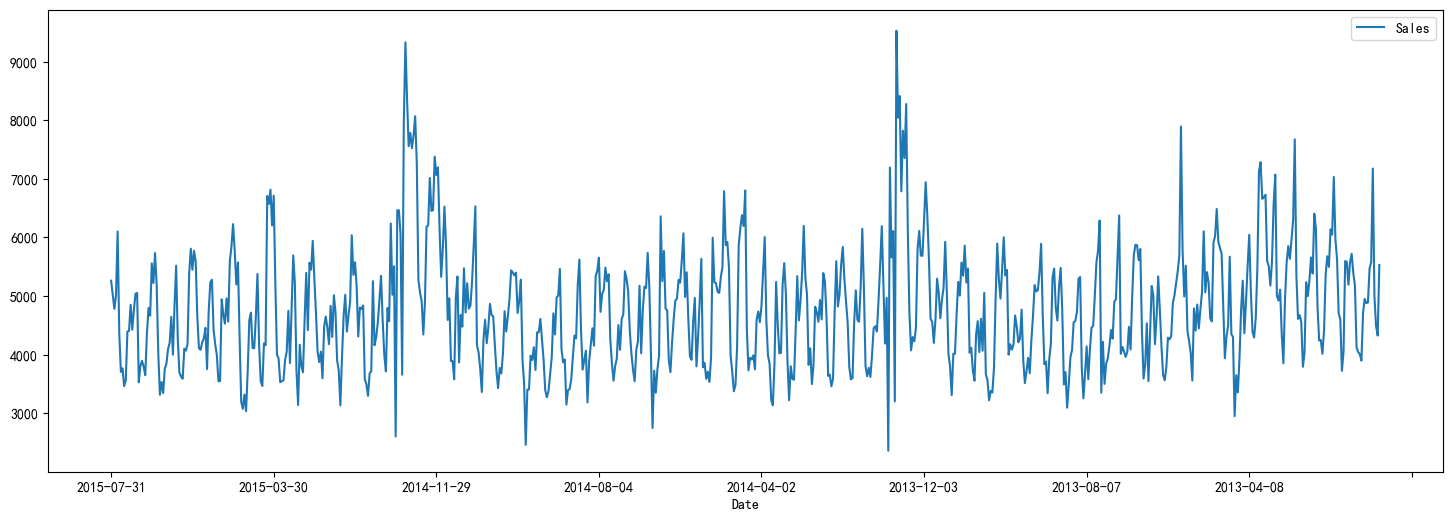

In [227]:
data_train.loc[(data_train['Store'] == 1) & (data_train['Sales'] > 0)].plot(
    x = 'Date',
    y = 'Sales',
    figsize = (18, 6),
    legend = True
)

### 数据合并

In [228]:
data_test['Date'].unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [229]:
data_train.shape
store_detail.shape
store_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [230]:
mixtrain = pd.merge(data_train[data_train['Sales'] > 0], store_detail, how = 'left', on = 'Store')
mixtest = pd.merge(data_test, store_detail, how = 'left', on = 'Store')
display(mixtest.shape, mixtrain.shape)

(41088, 17)

(844338, 18)

In [231]:
mixtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        844338 non-null  float64
 12  CompetitionOpenSinceMonth  844338 non-null  float64
 13  CompetitionOpenSinceYear   84

In [232]:
mixtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

## 特征工程

In [233]:
mixtrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


### 特征转换

In [234]:
mixtrain['StateHoliday'].unique()
mixtrain['StoreType'].unique()
mixtrain['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [235]:
def convertFun(df):
    
    if df['PromoInterval'] == 0: return 0
    elif df['month_str'] in df['PromoInterval']: return 1
    else: return 0


def feature_deal(data : pd.DataFrame):
    
    data['year'] = data['Date'].apply(lambda x : x.split('-')[0]).astype(int)
    data['month'] = data['Date'].apply(lambda x : x.split('-')[1]).astype(int)
    data['day'] = data['Date'].apply(lambda x : x.split('-')[2]).astype(int)

    month2str = {
        1:'Jan', 2:'Feb', 
        3:'Mar', 4:'Apr', 
        5:'May', 6:'Jun', 
        7:'Jul', 8:'Aug', 
        9:'Sep', 10:'Oct', 
        11:'Nov', 12:'Dec'
    }

    data['month_str'] = data['month'].map(month2str)
    data['isPromoInterval'] = data.apply(convertFun, axis = 1)
    
    mapping = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    
    data['StateHoliday'].replace(mapping, inplace = True)
    data['StoreType'].replace(mapping, inplace = True)
    data['Assortment'].replace(mapping, inplace = True)


for data in [mixtrain, mixtest]:
    feature_deal(data)    


In [236]:
mixtrain.head()
# mixtest.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,month_str,isPromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,31,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,2009.0,0,0.0,0.0,0,2015,7,31,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,2015.0,0,0.0,0.0,0,2015,7,31,Jul,0


### 特征清洗

In [237]:
new_mixtrain = mixtrain.drop(columns = ['Date', 'Open', 'month_str', 'PromoInterval', 'Customers'])
new_mixtest = mixtest.drop(columns = ['Date', 'Open', 'month_str', 'PromoInterval', 'Id'])

#将2015-6，7月份作为验证集
x_train = new_mixtrain.iloc[6*7*1115:]
x_test = new_mixtrain.iloc[:6*7*1115]

y_train = x_train['Sales']
y_test = x_test['Sales']

x_train = x_train.drop(columns = ['Sales'])
x_test = x_test.drop(columns = ['Sales'])



display(x_train.shape, x_test.shape)

(797508, 17)

(46830, 17)

<Axes: >

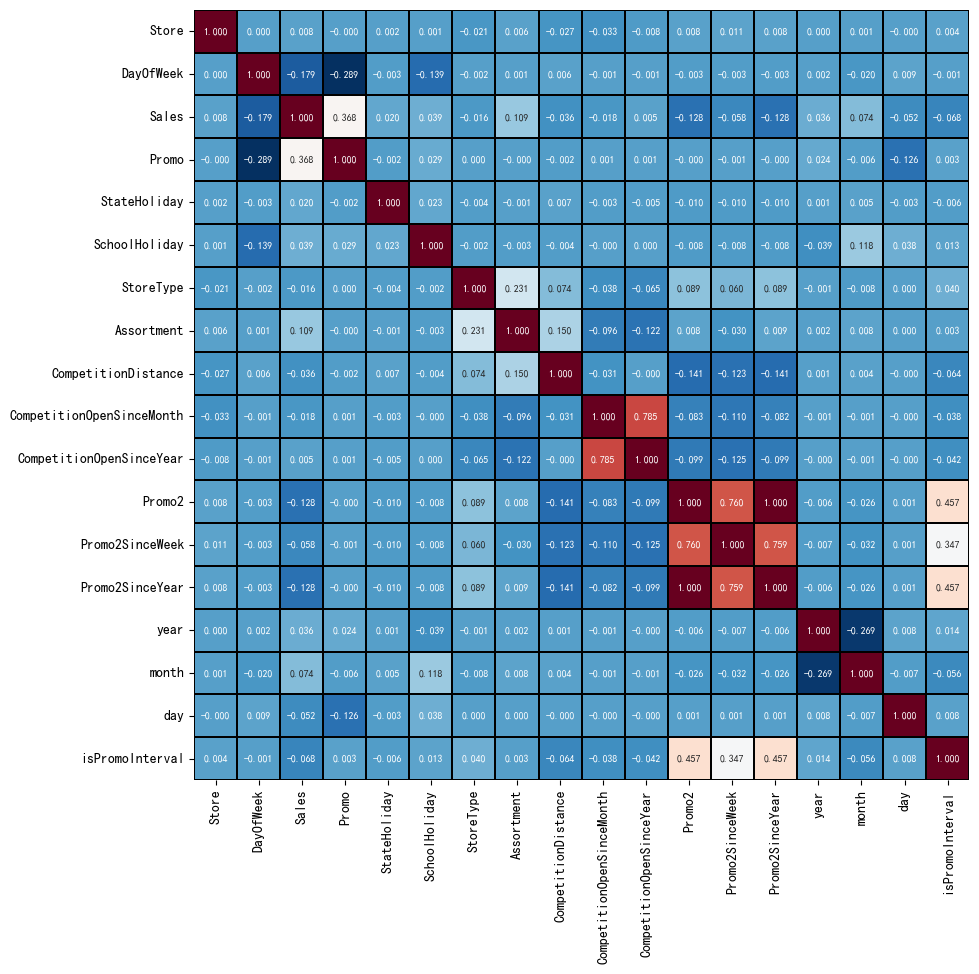

In [238]:
fig = plt.figure(figsize = (10, 10))

sns.heatmap(
    new_mixtrain.corr(),
    annot = True,
    annot_kws = {'size': 7},
    fmt = '.3f',
    linecolor = 'k',
    linewidths = 0.3,
    cbar = False,
    cmap = 'RdBu_r'
)


### 特征处理

C:\Users\wxhlo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


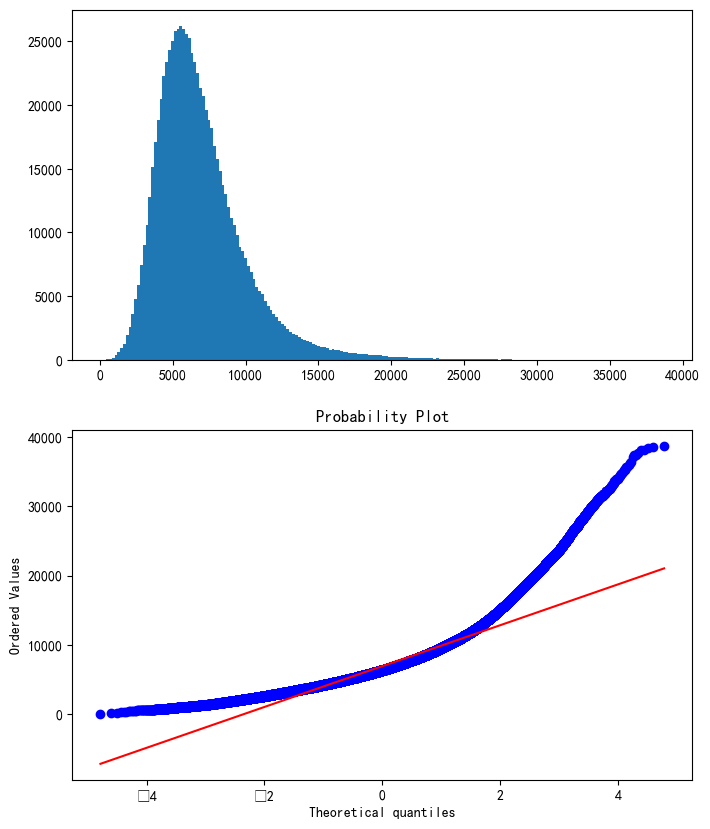

In [239]:
#查看sales字段数据分布
from  scipy.stats import probplot
fig, ax = plt.subplots(2, 1, figsize = (8, 10))

ax[0].hist(
    y_train,
    bins = 200
)
probplot(y_train, plot = ax[1], dist = 'norm')

plt.show()

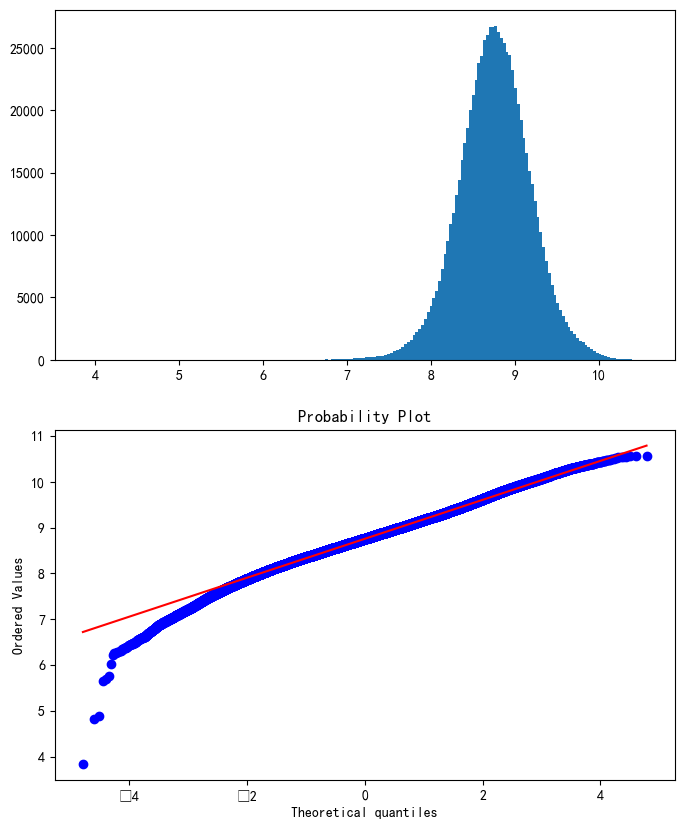

In [240]:
#对数化处理该字段

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

fig, ax = plt.subplots(2, 1, figsize = (8, 10))

ax[0].hist(
    y_train,
    bins = 200
)
probplot(y_train, plot = ax[1], dist = 'norm')

plt.show()

## 模型构建

### 定义评估函数

$$
RMSPE = \sqrt{\frac{1}{n}\sum_{i=1}(\frac{y_i - yhat_i}{y_i})^2}
$$

In [241]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((y - yhat)/y)**2)

#放大作用
def rmspe_xg(y, yhat):
    y = np.expm1(y) # np.expm1 == np.exp - 1
    yhat = np.expm1(yhat.get_label())
    return "rmspe", rmspe(y, yhat)

### 训练模型

In [242]:
params = {
    'objective' : 'reg:linear',
    'booster' : 'gbtree',
    'eta' : 0.3,
    'max_depth' : None,
    'min_child_weight' : 1,
    'subsample' : 0.7,
    'colsample_bytree' : 0.9,
    'nthread' : -1,
    'silent' : 1
}

dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)
n_estimators = 8000

gbm = xgb.train(
    dtrain = dtrain, 
    params = params, 
    num_boost_round = n_estimators,
    evals = [(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds = 100,
    feval = rmspe_xg,
    verbose_eval = True
    
)

[0]	train-rmse:0.39272	train-rmspe:0.07969	test-rmse:0.38344	test-rmspe:0.10708
[1]	train-rmse:0.37241	train-rmspe:0.07139	test-rmse:0.36379	test-rmspe:0.09859


d:\miniconda3\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
d:\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
d:\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	train-rmse:0.35638	train-rmspe:0.06521	test-rmse:0.34612	test-rmspe:0.09110
[3]	train-rmse:0.34768	train-rmspe:0.06202	test-rmse:0.33725	test-rmspe:0.08294
[4]	train-rmse:0.34083	train-rmspe:0.05943	test-rmse:0.33368	test-rmspe:0.06463
[5]	train-rmse:0.33565	train-rmspe:0.05779	test-rmse:0.32852	test-rmspe:0.06119
[6]	train-rmse:0.33212	train-rmspe:0.05648	test-rmse:0.32683	test-rmspe:0.06020
[7]	train-rmse:0.32278	train-rmspe:0.05314	test-rmse:0.31782	test-rmspe:0.05588
[8]	train-rmse:0.32046	train-rmspe:0.05222	test-rmse:0.31544	test-rmspe:0.05332
[9]	train-rmse:0.31604	train-rmspe:0.05084	test-rmse:0.31122	test-rmspe:0.05380
[10]	train-rmse:0.31091	train-rmspe:0.04931	test-rmse:0.30593	test-rmspe:0.05221
[11]	train-rmse:0.30904	train-rmspe:0.04863	test-rmse:0.30376	test-rmspe:0.04115
[12]	train-rmse:0.30596	train-rmspe:0.04747	test-rmse:0.30073	test-rmspe:0.04006
[13]	train-rmse:0.30039	train-rmspe:0.04578	test-rmse:0.29543	test-rmspe:0.03841
[14]	train-rmse:0.29297	train-rmspe:

### 评估模型

In [243]:
dtest = xgb.DMatrix(x_test, label = y_test)

y_pred = gbm.predict(dtest)

error = rmspe(
    np.expm1(y_test),
    np.expm1(y_pred)
)
display(f'RMSPE: {error}')

'RMSPE: 0.024474906844272424'

In [244]:
res = pd.DataFrame(y_test)
res['prediction'] = y_pred

res.head()
res = pd.merge(x_test, res, left_index = True, right_index = True)

res['Ratio'] = res['prediction'] / res['Sales']
res['Error'] = abs(1 - res['Ratio'])
res.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceWeek,Promo2SinceYear,year,month,day,isPromoInterval,Sales,prediction,Ratio,Error
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,...,0.0,0.0,2015,7,31,0,8.568646,8.683613,1.013417,0.013417
1,2,5,1,0,1,1,1,570.0,11.0,2007.0,...,13.0,2010.0,2015,7,31,1,8.710290,8.737090,1.003077,0.003077
2,3,5,1,0,1,1,1,14130.0,12.0,2006.0,...,14.0,2011.0,2015,7,31,1,9.025816,9.078660,1.005855,0.005855
3,4,5,1,0,1,3,3,620.0,9.0,2009.0,...,0.0,0.0,2015,7,31,0,9.546527,9.356369,0.980081,0.019919
4,5,5,1,0,1,1,1,29910.0,4.0,2015.0,...,0.0,0.0,2015,7,31,0,8.481151,8.699243,1.025715,0.025715


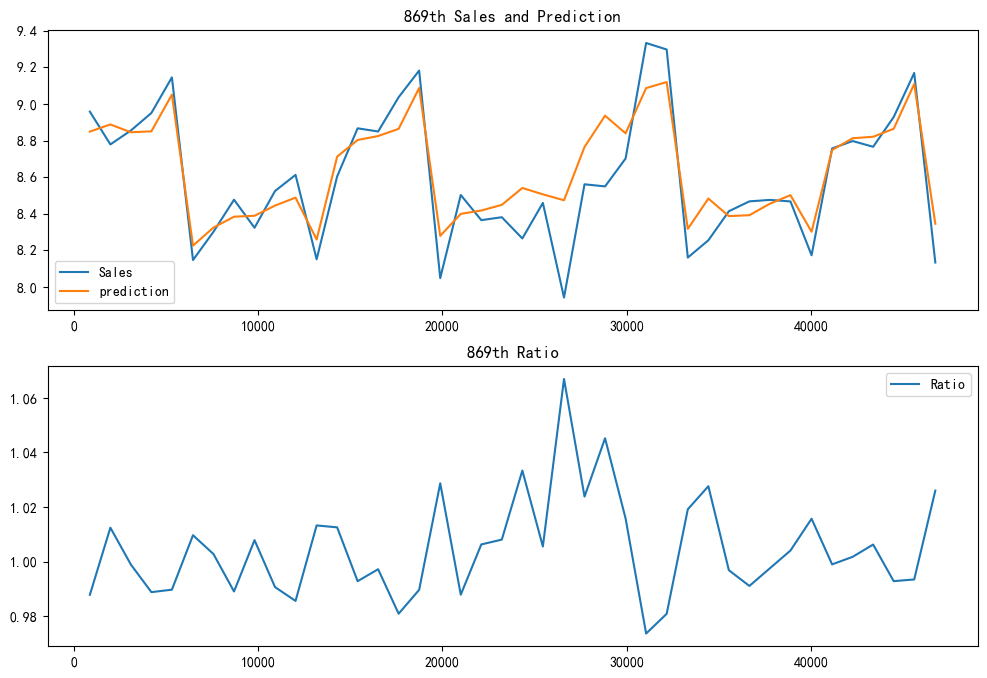

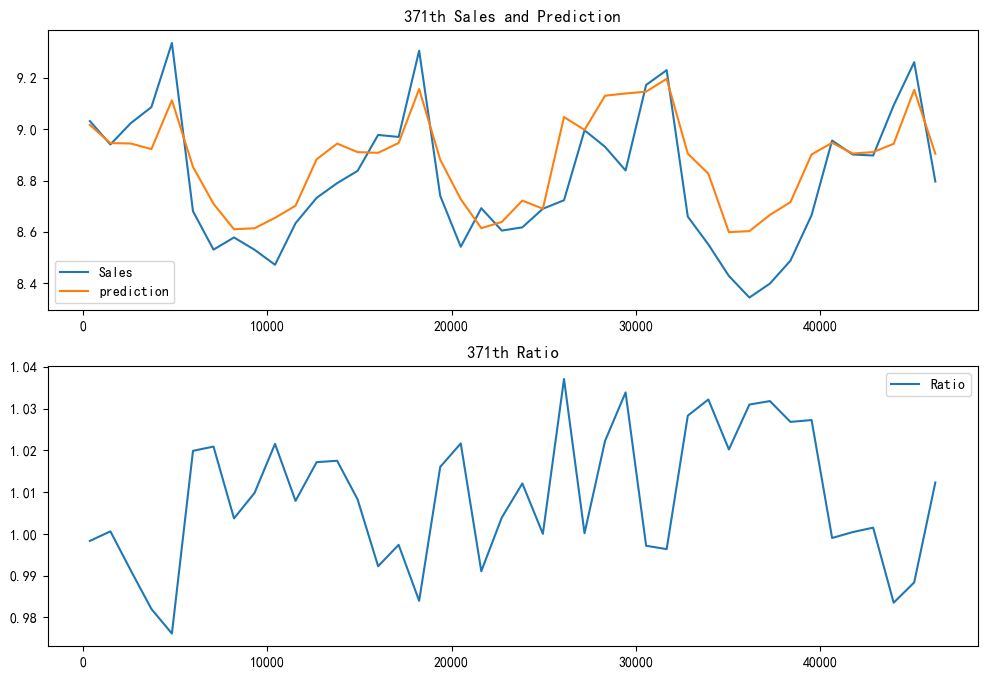

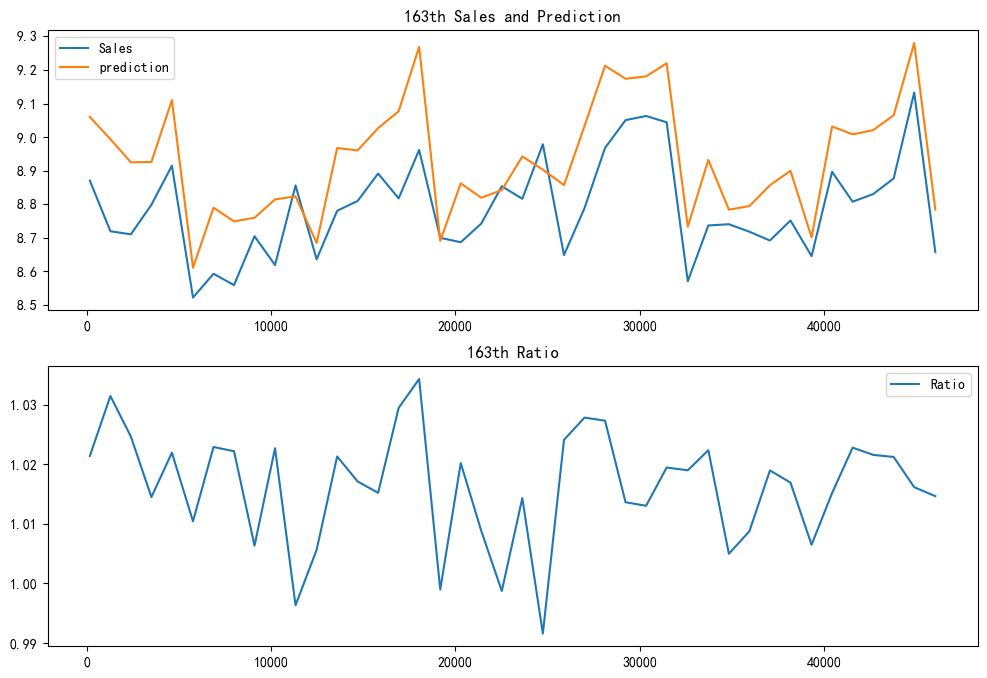

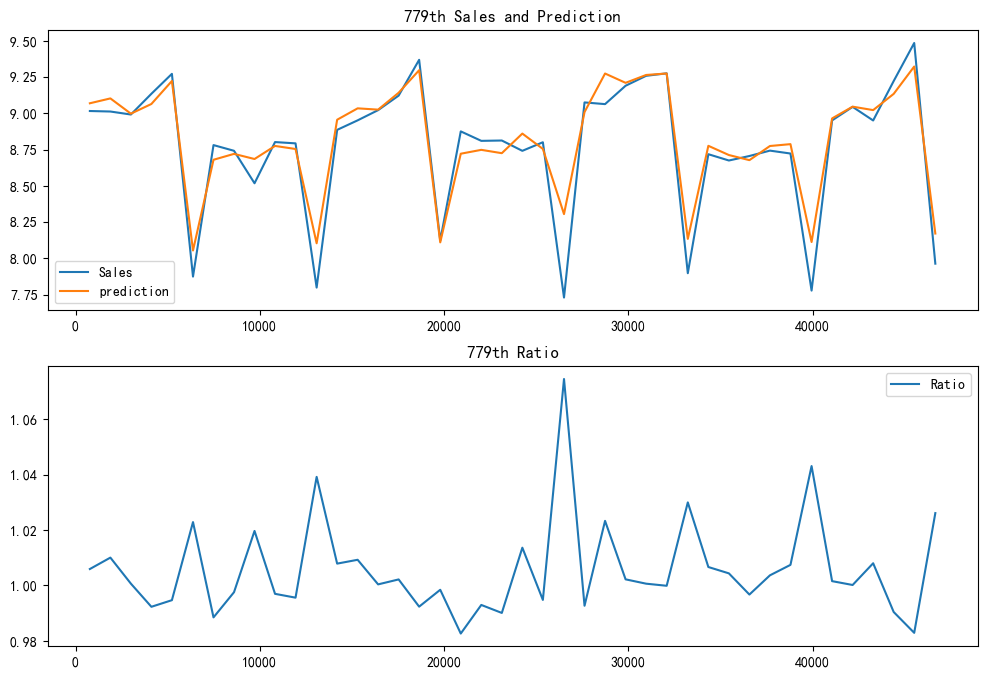

In [245]:
#可视化
col_1 = ['Sales', 'prediction']
col_2 = ['Ratio']

shops = np.random.randint(1, 1116, size = 4)

def sales_pred_plot(df1, df2, shop):
    
    fig, ax = plt.subplots(2, 1, figsize = (12, 8))

    df1.plot(
        ax = ax[0],
        title = f'{shop}th Sales and Prediction'
    )
    df2.plot(
        ax = ax[1],
        title = f'{shop}th Ratio'
    )
    
for shop in shops:
    cond = res['Store'] == shop
    df1 = pd.DataFrame(data = res[cond], columns = col_1)
    df2 = pd.DataFrame(data = res[cond], columns = col_2)

    sales_pred_plot(df1, df2, shop)

## 模型调优

best_index=22	minerror=0.0004385089257681056	best_weight=0.9972


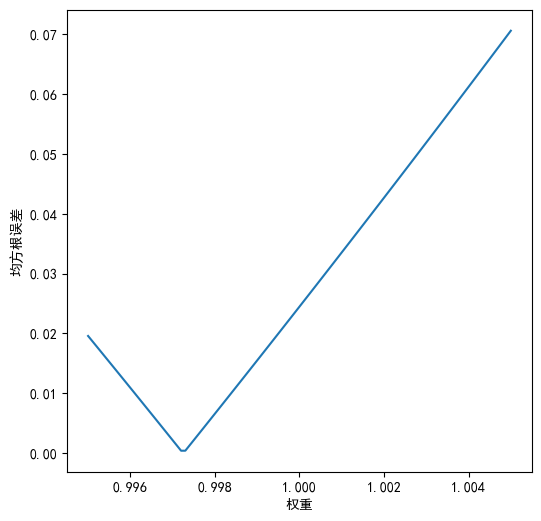

In [246]:
#全局调优

weights = [1.0 + (i/10000) for i in range(-50, 51)]

# weights                 
errors = []
for w in weights:
    err = rmspe(np.expm1(y_test), np.expm1(y_pred * w))
    errors.append(err)
errors = np.array(errors)

plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize = (6, 6))
plt.plot(weights, errors)
plt.ylabel('均方根误差')
plt.xlabel('权重')


index = errors.argmin()
print(
    f'best_index={index}', 
    f'minerror={errors[index]}', 
    f'best_weight={weights[index]}', 
    sep = '\t'
)

In [247]:
display(new_mixtest.shape, res.shape)
display(new_mixtest.info())

(41088, 17)

(46830, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   DayOfWeek                  41088 non-null  int64  
 2   Promo                      41088 non-null  int64  
 3   StateHoliday               41088 non-null  int64  
 4   SchoolHoliday              41088 non-null  int64  
 5   StoreType                  41088 non-null  int64  
 6   Assortment                 41088 non-null  int64  
 7   CompetitionDistance        41088 non-null  float64
 8   CompetitionOpenSinceMonth  41088 non-null  float64
 9   CompetitionOpenSinceYear   41088 non-null  float64
 10  Promo2                     41088 non-null  int64  
 11  Promo2SinceWeek            41088 non-null  float64
 12  Promo2SinceYear            41088 non-null  float64
 13  year                       41088 non-null  int

None

In [248]:
#局部调优，针对每一个店铺获取最优权重

shops = np.arange(1, 1116)
weightsOfvalidation = []
weightsOftest = []

def get_best_w(shop):

    cond1 = res['Store'] == shop
    cond2 = new_mixtest['Store'] == shop
    
    df1 = res[cond1]
    df2 = new_mixtest[cond2]
    weights = [1.0 + (i/10000) for i in range(-50, 51)]
    errors = []
    for w in weights:
        err = rmspe(np.expm1(df1['Sales']), np.expm1(df1['prediction'] * w))
        errors.append(err)
    errors = np.array(errors)
    index = errors.argmin()
    best_w = np.array(weights[index])
    min_erro = errors[index]

    weightsOfvalidation.extend(best_w.repeat(len(df1)).tolist())
    weightsOftest.extend(best_w.repeat(len(df2)).tolist())

for shop in shops:
    get_best_w(shop)
    
x_test.sort_values(by = 'Store', inplace = True)
x_test['weightsOfvalidation'] = weightsOfvalidation
x_test.sort_index(inplace = True)
weightsOfvalidation = x_test['weightsOfvalidation']
x_test.drop(columns = 'weightsOfvalidation', inplace = True)

new_mixtest.sort_values(by = 'Store', inplace = True)
new_mixtest['weightsOftest'] = weightsOftest
new_mixtest.sort_index(inplace = True)
weightsOftest = new_mixtest['weightsOftest']
new_mixtest.drop(columns = 'weightsOftest', inplace = True)

display(set(weightsOfvalidation), set(weightsOftest))

{0.995,
 0.9951,
 0.9952,
 0.9953,
 0.9954,
 0.9955,
 0.9956,
 0.9957,
 0.9958,
 0.9959,
 0.996,
 0.9961,
 0.9962,
 0.9963,
 0.9964,
 0.9965,
 0.9966,
 0.9967,
 0.9968,
 0.9969,
 0.997,
 0.9971,
 0.9972,
 0.9973,
 0.9974,
 0.9975,
 0.9976,
 0.9977,
 0.9978,
 0.9979,
 0.998,
 0.9981,
 0.9982,
 0.9983,
 0.9984,
 0.9985,
 0.9986,
 0.9987,
 0.9988,
 0.9989,
 0.999,
 0.9991,
 0.9992,
 0.9993,
 0.9994,
 0.9995,
 0.9996,
 0.9997,
 0.9998,
 0.9999,
 1.0,
 1.0001,
 1.0002,
 1.0003,
 1.0004,
 1.0005,
 1.0006,
 1.0007,
 1.0008,
 1.0009,
 1.001,
 1.0011,
 1.0012,
 1.0013,
 1.0014,
 1.0015,
 1.0016,
 1.0017,
 1.0018,
 1.0019,
 1.002,
 1.0021,
 1.0022,
 1.0023,
 1.0024,
 1.0025,
 1.0026,
 1.0027,
 1.0028,
 1.0029,
 1.003,
 1.0031,
 1.0032,
 1.0033,
 1.0034,
 1.0035,
 1.0036,
 1.0037,
 1.0038,
 1.0039,
 1.004,
 1.0041,
 1.0042,
 1.0043,
 1.0044,
 1.0045,
 1.0046,
 1.0047,
 1.0049,
 1.005}

{0.995,
 0.9951,
 0.9952,
 0.9953,
 0.9954,
 0.9955,
 0.9956,
 0.9957,
 0.9958,
 0.9959,
 0.996,
 0.9961,
 0.9962,
 0.9963,
 0.9964,
 0.9965,
 0.9966,
 0.9967,
 0.9968,
 0.9969,
 0.997,
 0.9971,
 0.9972,
 0.9973,
 0.9974,
 0.9975,
 0.9976,
 0.9977,
 0.9978,
 0.9979,
 0.998,
 0.9981,
 0.9982,
 0.9983,
 0.9984,
 0.9985,
 0.9986,
 0.9987,
 0.9988,
 0.9989,
 0.999,
 0.9991,
 0.9992,
 0.9994,
 0.9995,
 0.9996,
 0.9997,
 0.9998,
 0.9999,
 1.0,
 1.0001,
 1.0002,
 1.0003,
 1.0004,
 1.0005,
 1.0006,
 1.0007,
 1.0008,
 1.0009,
 1.001,
 1.0011,
 1.0012,
 1.0013,
 1.0014,
 1.0015,
 1.0016,
 1.0017,
 1.0018,
 1.0019,
 1.002,
 1.0021,
 1.0022,
 1.0023,
 1.0024,
 1.0025,
 1.0026,
 1.0027,
 1.0028,
 1.0029,
 1.003,
 1.0031,
 1.0032,
 1.0033,
 1.0034,
 1.0035,
 1.0036,
 1.0037,
 1.0038,
 1.0039,
 1.004,
 1.0041,
 1.0042,
 1.0043,
 1.0044,
 1.0045,
 1.0046,
 1.0047,
 1.0049,
 1.005}

In [249]:
display(
    f'局部：{rmspe(np.expm1(y_test), np.expm1(y_pred * weightsOfvalidation))}',
    f'全局: {rmspe(np.expm1(y_test), np.expm1(y_pred * 0.997))}'
)


'局部：0.011806475172939765'

'全局: 0.0021949380358280996'

## 预测提交

In [250]:
final_test = xgb.DMatrix(new_mixtest)

y_pred = gbm.predict(final_test)

In [251]:
#未优化
result = pd.DataFrame({
    'Id' : np.arange(1, 41089),
    'Sales' : np.expm1(y_pred)
})

result.to_csv('./datasets/rossmann-store-sales/submission_1.csv', index = False)

In [252]:
#全局优化
result = pd.DataFrame({
    'Id' : np.arange(1, 41089),
    'Sales' : np.expm1(y_pred * 0.9964)
})
result.to_csv('./datasets/rossmann-store-sales/submission_2.csv', index = False)

In [253]:
#局部优化
result = pd.DataFrame({
    'Id' : np.arange(1, 41089),
    'Sales' : np.expm1(y_pred * weightsOftest)
})
result.to_csv('./datasets/rossmann-store-sales/submission_3.csv', index = False)